<h1 style='color: green; font-size: 36px; font-weight: bold;'>Data Science - Regressão Linear</h1>

# <font color='red' style='font-size: 30px;'>Conhecendo o Dataset</font>
<hr style='border: 2px solid red;'>

## Importando bibliotecas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

## O Dataset e o Projeto
<hr>

### Fonte: https://www.kaggle.com/greenwing1985/housepricing

### Descrição:
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Nosso objetivo neste exercício é criar um modelo de machine learning, utilizando a técnica de Regressão Linear, que faça previsões sobre os preços de imóveis a partir de um conjunto de características conhecidas dos imóveis.</p>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Vamos utilizar um dataset disponível no Kaggle que foi gerado por computador para treinamento de machine learning para iniciantes. Este dataset foi modificado para facilitar o nosso objetivo, que é fixar o conhecimento adquirido no treinamento de Regressão Linear.</p>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Siga os passos propostos nos comentários acima de cada célular e bons estudos.</p>

### Dados:
<ul style='font-size: 18px; line-height: 2; text-align: justify;'>
    <li><b>precos</b> - Preços do imóveis</li>
    <li><b>area</b> - Área do imóvel</li>
    <li><b>garagem</b> - Número de vagas de garagem</li>
    <li><b>banheiros</b> - Número de banheiros</li>
    <li><b>lareira</b> - Número de lareiras</li>
    <li><b>marmore</b> - Se o imóvel possui acabamento em mármore branco (1) ou não (0)</li>
    <li><b>andares</b> - Se o imóvel possui mais de um andar (1) ou não (0)</li>
</ul>

## Leitura dos dados

Dataset está na pasta "Dados" com o nome "HousePrices_HalfMil.csv" em usa como separador ";".

In [2]:
dataset = pd.read_csv('dados/HousePrices_HalfMil.csv', sep= ';')

## Visualizar os dados

In [3]:
dataset.head(10)

,precos,area,garagem,banheiros,lareira,marmore,andares
0,51875,25,3,4,3,0,1
1,17875,35,1,3,1,0,0
2,47075,195,2,4,2,0,0
3,38575,33,2,2,1,0,1
4,33775,11,2,3,0,0,1
5,35450,148,2,5,2,0,0
6,52025,211,2,3,2,1,0
7,37550,172,2,2,3,1,0
8,31500,62,1,4,2,0,0
9,37650,218,3,1,0,1,0


## Verificando o tamanho do dataset

In [4]:
dataset.shape

(1000, 7)

# <font color='red' style='font-size: 30px;'>Análises Preliminares</font>
<hr style='border: 2px solid red;'>

## Estatísticas descritivas

In [5]:
dataset.describe().round(2)

,precos,area,garagem,banheiros,lareira,marmore,andares
count,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00
mean,41985.60,124.33,2.01,3.00,2.03,0.33,0.48
std,12140.39,72.39,0.81,1.43,1.42,0.47,0.50
min,13150.00,1.00,1.00,1.00,0.00,0.00,0.00
25%,33112.50,60.75,1.00,2.00,1.00,0.00,0.00
50%,41725.00,123.00,2.00,3.00,2.00,0.00,0.00
75%,51175.00,187.00,3.00,4.00,3.00,1.00,1.00
max,73675.00,249.00,3.00,5.00,4.00,1.00,1.00


## Matriz de correlação

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>O <b>coeficiente de correlação</b> é uma medida de associação linear entre duas variáveis e situa-se entre <b>-1</b> e <b>+1</b> sendo que <b>-1</b> indica associação negativa perfeita e <b>+1</b> indica associação positiva perfeita.</p>

### Observe as correlações entre as variáveis:
<ul style='font-size: 16px; line-height: 2; text-align: justify;'>
    <li>Quais são mais correlacionadas com a variável dependete (Preço)?</li>
            Se possui marmore e número de andares;
    <li>Qual o relacionamento entre elas (positivo ou negativo)?</li>
            Associação positiva entre as variáveis;
    <li>Existe correlação forte entre as variáveis explicativas?</li>
            Apenas as essas duas
</ul>

In [6]:
dataset.corr()

,precos,area,garagem,banheiros,lareira,marmore,andares
precos,1.000000,0.117689,0.102752,0.124390,0.107209,0.430767,0.631529
area,0.117689,1.000000,-0.007530,-0.011374,0.012114,-0.015270,-0.018006
garagem,0.102752,-0.007530,1.000000,0.067142,0.060455,-0.015629,-0.020588
banheiros,0.124390,-0.011374,0.067142,1.000000,0.048363,-0.025281,-0.018203
lareira,0.107209,0.012114,0.060455,0.048363,1.000000,0.029591,-0.003513
marmore,0.430767,-0.015270,-0.015629,-0.025281,0.029591,1.000000,-0.006527
andares,0.631529,-0.018006,-0.020588,-0.018203,-0.003513,-0.006527,1.000000


# <font color='red' style='font-size: 30px;'>Comportamento da Variável Dependente (Y)</font>
<hr style='border: 2px solid red;'>

# Análises gráficas

<img width='700px' src='../Dados/img/Box-Plot.png'>

## Importando biblioteca seaborn

In [7]:
import seaborn as sns

## Configure o estilo e cor dos gráficos (opcional)

In [8]:
# Pre-seted in Jupyter Notebook

## Box plot da variável *dependente* (y)


### Avalie o comportamento da distribuição da variável dependente:
<ul style='font-size: 16px; line-height: 2; text-align: justify;'>
    <li>Parecem existir valores discrepantes (outliers)?</li>
    Sem valores discrepantes ou outliers
    <li>O box plot apresenta alguma tendência?</li>
    O boxplot não apresenta tendencia/lateralidade
</ul>

https://seaborn.pydata.org/generated/seaborn.boxplot.html?highlight=boxplot#seaborn.boxplot

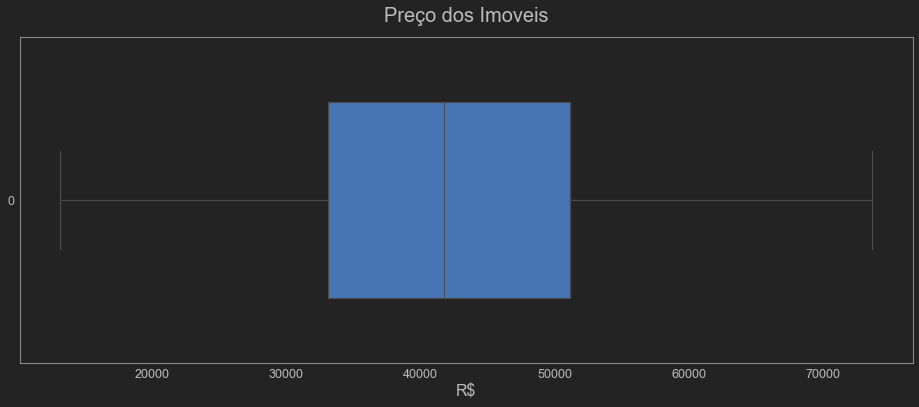

In [9]:
ax = sns.boxplot(data = dataset['precos'], orient = 'h',color ='b', width = 0.6) 
ax.grid(False)
ax.figure.set_size_inches(16,6)
ax.set_title('Preço dos Imoveis', fontsize= 20, pad= 15)
ax.set_xlabel('R$', fontsize= 16)
ax=ax

Notas:
Sem outliers, a mediana aparece no centro do boxplot, indicando simetria

## Investigando a variável *dependente* (y) juntamente com outras característica

Faça um box plot da variável dependente em conjunto com cada variável explicativa (somente as categóricas).

### Avalie o comportamento da distribuição da variável dependente com cada variável explicativa categórica:
<ul style='font-size: 16px; line-height: 2; text-align: justify;'>
    <li>As estatísticas apresentam mudança significativa entre as categorias?</li>
    <li>O box plot apresenta alguma tendência bem definida?</li>
</ul>

### Box-plot (Preço X Garagem)

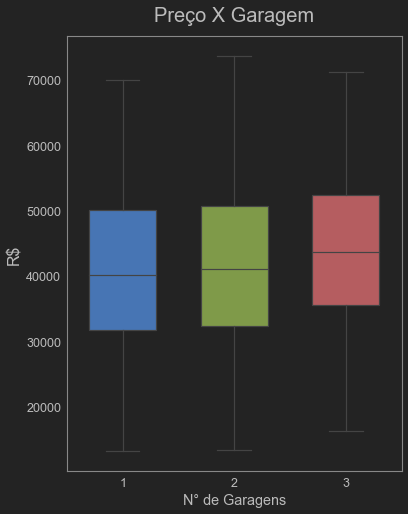

In [10]:
ax = sns.boxplot(data = dataset, y= 'precos', x= 'garagem', orient = 'v', width = 0.6) 
ax.grid(False)
ax.figure.set_size_inches(6,8)
ax.set_title('Preço X Garagem', fontsize= 20, pad= 15)
ax.set_ylabel('R$', fontsize= 16)
ax.set_xlabel('N° de Garagens')
ax=ax

### Box-plot (Preço X Banheiros)

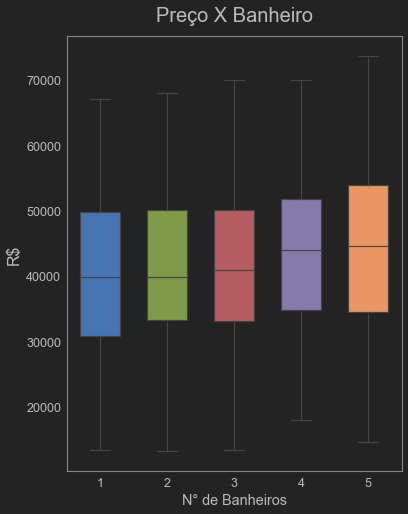

In [11]:
ax = sns.boxplot(data = dataset, y= 'precos', x= 'banheiros', orient = 'v', width = 0.6) 
ax.grid(False)
ax.figure.set_size_inches(6,8)
ax.set_title('Preço X Banheiro', fontsize= 20, pad= 15)
ax.set_ylabel('R$', fontsize= 16)
ax.set_xlabel('N° de Banheiros')
ax=ax

### Box-plot (Preço X Lareira)

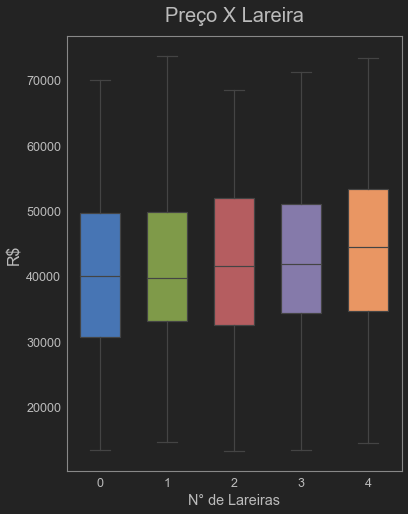

In [12]:
ax = sns.boxplot(data = dataset, y= 'precos', x= 'lareira', orient = 'v', width = 0.6) 
ax.grid(False)
ax.figure.set_size_inches(6,8)
ax.set_title('Preço X Lareira', fontsize= 20, pad= 15)
ax.set_ylabel('R$', fontsize= 16)
ax.set_xlabel('N° de Lareiras')
ax=ax

### Box-plot (Preço X Acabamento em Mármore)

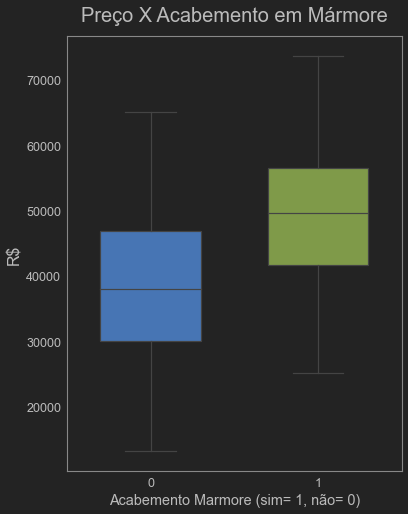

In [13]:
ax = sns.boxplot(data = dataset, y= 'precos', x= 'marmore', orient = 'v', width = 0.6) 
ax.grid(False)
ax.figure.set_size_inches(6,8)
ax.set_title('Preço X Acabemento em Mármore', fontsize= 20, pad= 15)
ax.set_ylabel('R$', fontsize= 16)
ax.set_xlabel('Acabemento Marmore (sim= 1, não= 0)')
ax=ax

### Box-plot (Preço X Andares)

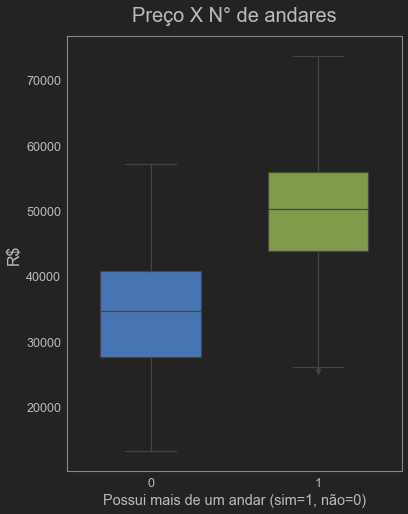

In [36]:
ax = sns.boxplot(data = dataset, y= 'precos', x= 'andares', orient = 'v', width = 0.6) 
ax.grid(False)
ax.figure.set_size_inches(6,8)
ax.set_title('Preço X N° de andares', fontsize= 20, pad= 15)
ax.set_ylabel('R$', fontsize= 16)
ax.set_xlabel('Possui mais de um andar (sim=1, não=0)')
ax=ax

## Distribuição de frequências da variável *dependente* (y)

Construa um histograma da variável dependente (Preço).

### Avalie:
<ul style='font-size: 16px; line-height: 2; text-align: justify;'>
    <li>A distribuição de frequências da variável dependente parece ser assimétrica?</li>
    <li>É possível supor que a variável dependente segue uma distribuição normal?</li>
</ul>

https://seaborn.pydata.org/generated/seaborn.distplot.html?highlight=distplot#seaborn.distplot

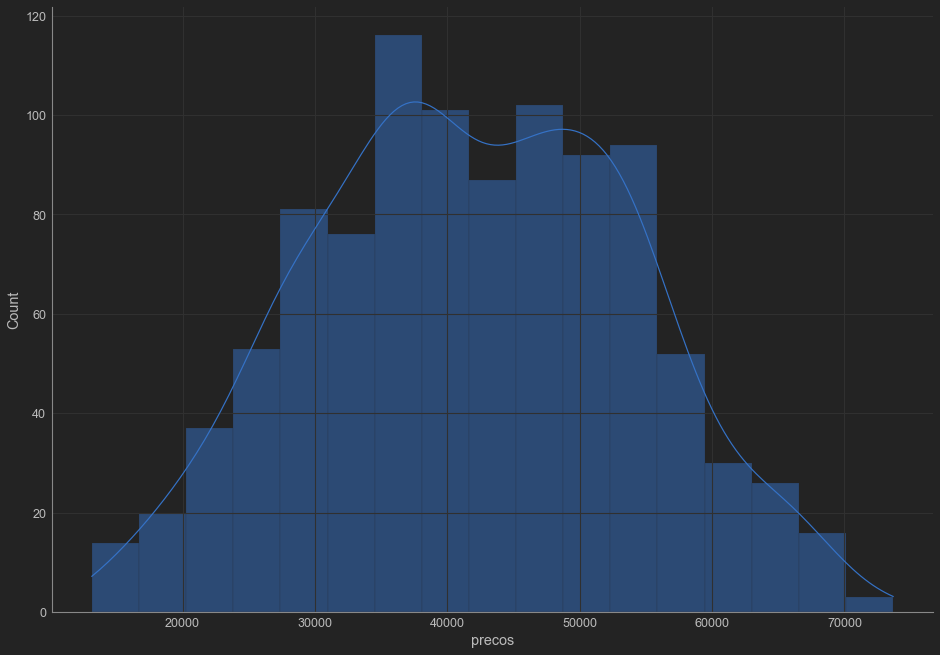

In [38]:
ax = sns.displot(dataset.precos, kde=True)
ax.figure.set_size_inches(15,10)
ax.set_titles('Distribuição de Frequencia')
ax=ax

Notas: Grafico apresenta normalidade e simetria

## Gráficos de dispersão entre as variáveis do dataset

## Plotando o pairplot fixando somente uma variável no eixo y

https://seaborn.pydata.org/generated/seaborn.pairplot.html?highlight=pairplot#seaborn.pairplot

Plote gráficos de dispersão da variável dependente contra cada variável explicativa. Utilize o pairplot da biblioteca seaborn para isso.

Plote o mesmo gráfico utilizando o parâmetro kind='reg'.

### Avalie:
<ul style='font-size: 16px; line-height: 2; text-align: justify;'>
    <li>É possível identificar alguma relação linear entre as variáveis?</li>
    <li>A relação é positiva ou negativa?</li>
    <li>Compare com os resultados obtidos na matriz de correlação.</li>
</ul>

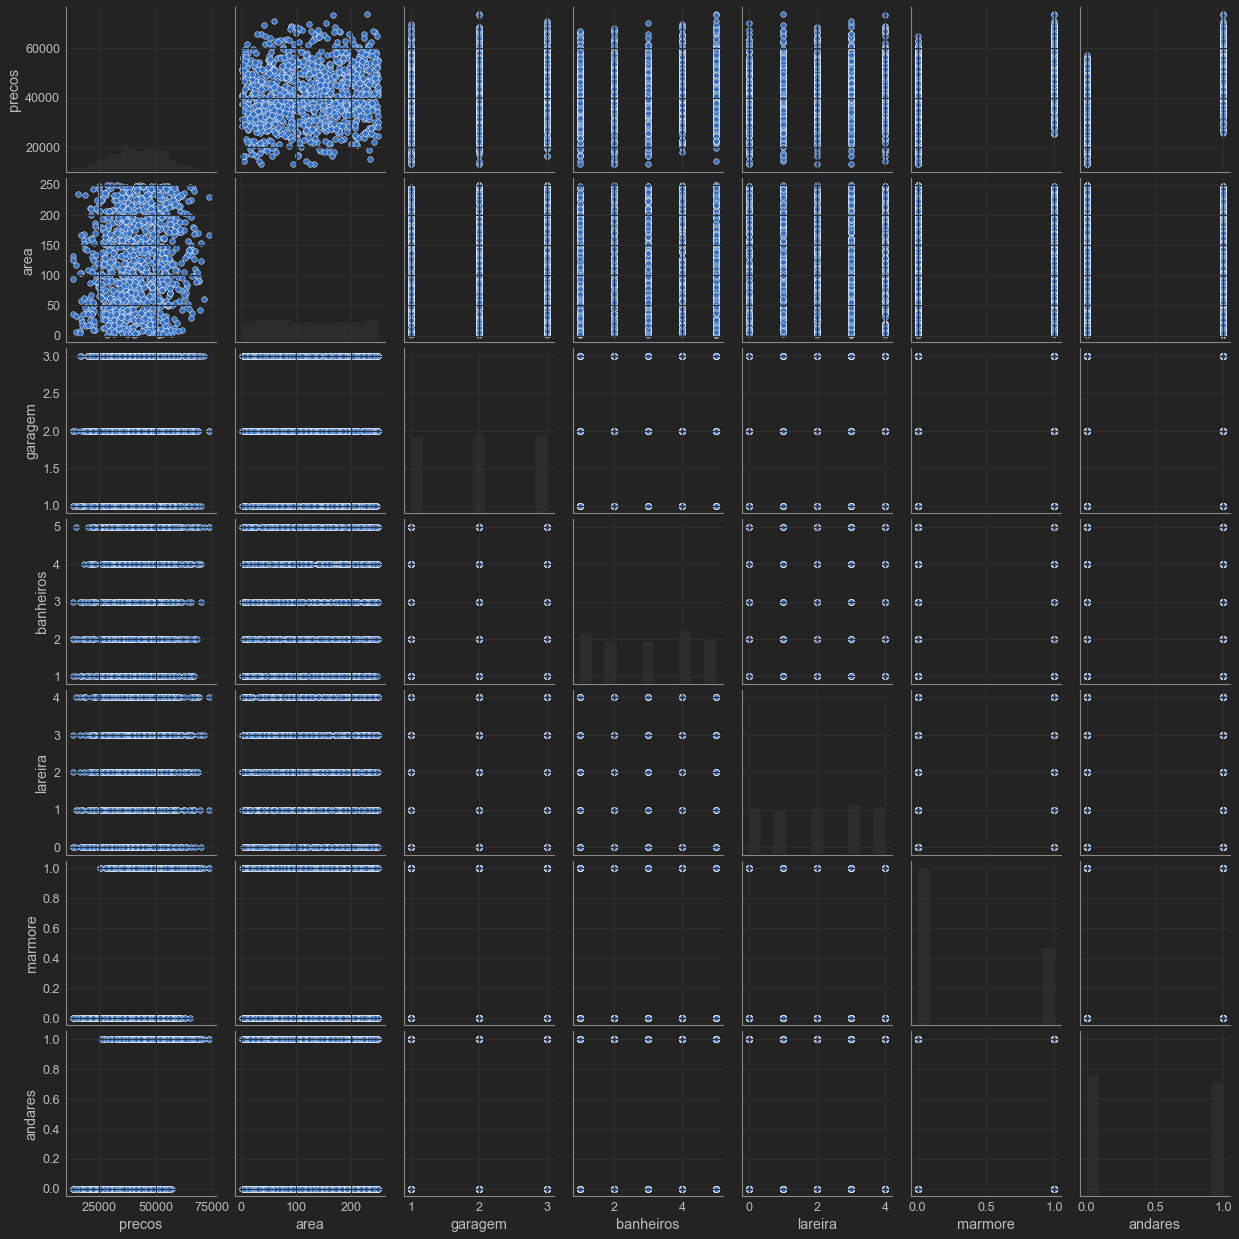

In [16]:
ax = sns.pairplot(dataset)
ax

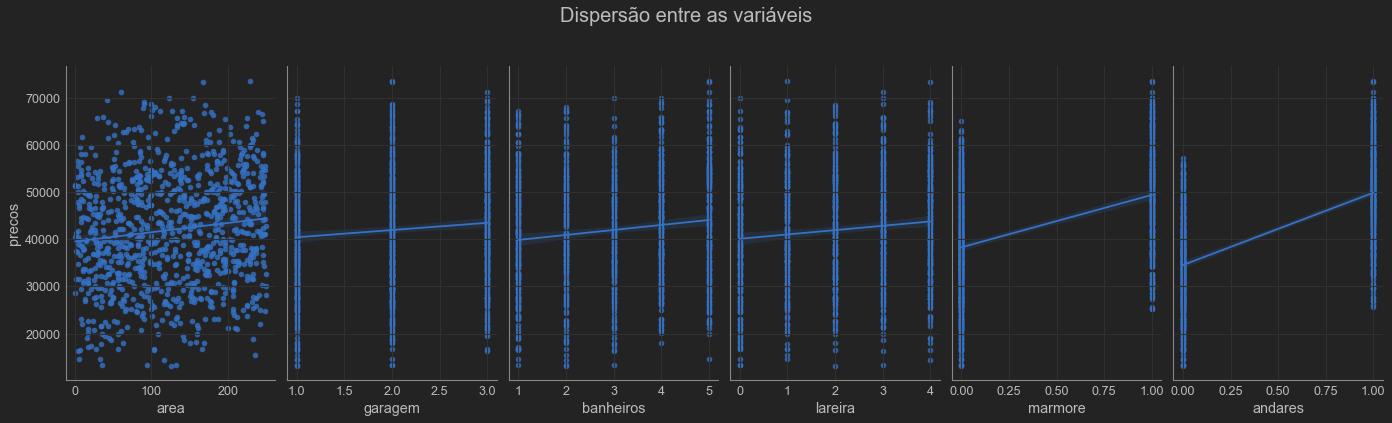

In [17]:
ax = sns.pairplot(dataset, y_vars = 'precos', x_vars = ['area', 'garagem', 'banheiros', 'lareira','marmore', 'andares'], kind = 'reg')
ax.fig.suptitle('Dispersão entre as variáveis', fontsize= 20, y= 1.1)
ax.figure.set_size_inches(20,6)
ax=ax

# <font color='red' style='font-size: 30px;'>Estimando um Modelo de Regressão Linear</font>
<hr style='border: 2px solid red;'>

## Importando o *train_test_split* da biblioteca *scikit-learn*

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [18]:
from sklearn.model_selection import train_test_split

## Criando uma Series (pandas) para armazenar a variável dependente (y)

In [19]:
y = pd.Series(dataset.precos)
y

0      51875
1      17875
2      47075
3      38575
4      33775
       ...  
995    29150
996    43550
997    56575
998    56075
999    13350
Name: precos, Length: 1000, dtype: int64

## Criando um DataFrame (pandas) para armazenar as variáveis explicativas (X)

In [20]:
X = dataset[['area', 'garagem', 'banheiros', 'lareira','marmore', 'andares']]
X

,area,garagem,banheiros,lareira,marmore,andares
0,25,3,4,3,0,1
1,35,1,3,1,0,0
2,195,2,4,2,0,0
3,33,2,2,1,0,1
4,11,2,3,0,0,1
...,...,...,...,...,...,...
995,48,1,5,4,0,0
996,112,2,2,3,0,1
997,185,3,4,4,0,1
998,185,2,3,1,0,1


## Criando os datasets de treino e de teste

In [21]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=2811)

In [22]:
X_train.shape

(700, 6)

In [23]:
X_test.shape

(300, 6)

## Importando *LinearRegression* e *metrics* da biblioteca *scikit-learn*

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

https://scikit-learn.org/stable/modules/classes.html#regression-metrics

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

## Instanciando a classe *LinearRegression()*

In [25]:
modelo = LinearRegression()

## Utilizando o método *fit()* para estimar o modelo linear utilizando os dados de TREINO (X_train e y_train)

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.fit

In [26]:
modelo.fit(X_train, y_train)

LinearRegression()

## Obtendo o coeficiente de determinação (R²) do modelo estimado com os dados de TREINO

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.score


### Avalie:
<ul style='font-size: 16px; line-height: 2; text-align: justify;'>
    <li>O modelo apresenta um bom ajuste?</li>
    Ajuste Razoavel
    <li>Você lembra o que representa o R²?</li>
    O quanto da variação da variavel dependente é explicado pelas variáveis explicativas
    <li>Qual medida podemos tomar para melhorar essa estatística?</li>
    Quanto mais variáveis forem adicionadas, mais aumentaremos o R²
</ul>

In [27]:
print(f'R² = {modelo.score(X_train, y_train).round(2)}')

R² = 0.64


Nota: Modelo apresenta um ajuste razoavel (quanto mais alto, melhor)

## Gerando previsões para os dados de TESTE (X_test) utilizando o método *predict()*

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.predict

In [28]:
y_previsto = modelo.predict(X_test)

## Obtendo o coeficiente de determinação (R²) para as previsões do nosso modelo

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html#sklearn.metrics.r2_score

In [29]:
print(f'R² = {metrics.r2_score(y_test, y_previsto).round(2)}')

R² = 0.67


# <font color='red' style='font-size: 30px;'>Obtendo Previsões Pontuais</font>
<hr style='border: 2px solid red;'>

## Criando um simulador simples

Crie um simulador que gere estimativas de preço a partir de um conjunto de informações de um imóvel.

In [30]:
X_test.head(1)

,area,garagem,banheiros,lareira,marmore,andares
402,38,2,4,4,0,1


In [31]:
X_test.columns

Index(['area', 'garagem', 'banheiros', 'lareira', 'marmore', 'andares'], dtype='object')

In [32]:
area = 38
garagem = 2
banheiros = 4
lareira = 4
marmore = 0
andares = 1

entrada = [[area, garagem, banheiros, lareira, marmore, andares]]
print(f'Preço estimado para o imóvel será de aproximadamente: R$ {modelo.predict(entrada)[0].round(2)}')

Preço estimado para o imóvel será de aproximadamente: R$ 46389.8


# <font color='red' style='font-size: 30px;'>Métricas de Regressão</font>
<hr style='border: 2px solid red;'>

## Métricas da regressão
<hr>

fonte: https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics

Algumas estatísticas obtidas do modelo de regressão são muito úteis como critério de comparação entre modelos estimados e de seleção do melhor modelo, as principais métricas de regressão que o scikit-learn disponibiliza para modelos lineares são as seguintes:

### Erro Quadrático Médio

Média dos quadrados dos erros. Ajustes melhores apresentam $EQM$ mais baixo.

$$EQM(y, \hat{y}) = \frac 1n\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2$$

### Raíz do Erro Quadrático Médio

Raíz quadrada da média dos quadrados dos erros. Ajustes melhores apresentam $\sqrt{EQM}$ mais baixo.

$$\sqrt{EQM(y, \hat{y})} = \sqrt{\frac 1n\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2}$$

### Coeficiente de Determinação - R²

O coeficiente de determinação (R²) é uma medida resumida que diz quanto a linha de regressão ajusta-se aos dados. É um valor entra 0 e 1.

$$R^2(y, \hat{y}) = 1 - \frac {\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2}{\sum_{i=0}^{n-1}(y_i-\bar{y}_i)^2}$$

## Obtendo métricas para o modelo

In [33]:
EQM = metrics.mean_squared_error(y_test, y_previsto).round(2)
root_EQM = np.sqrt(EQM).round(2)
R2 = metrics.r2_score(y_test, y_previsto).round(2)

pd.DataFrame([EQM, root_EQM, R2], index= ['EQM', 'Raiz_EQM', 'R²'], columns = ['Métricas'])

,Métricas
EQM,50197019.50
Raiz_EQM,7084.99
R²,0.67


# <font color='red' style='font-size: 30px;'>Salvando e Carregando o Modelo Estimado</font>
<hr style='border: 2px solid red;'>

## Importando a biblioteca pickle

In [34]:
import pickle

## Salvando o modelo estimado

In [35]:
with open('modelo_preco_imovel', 'wb') as f:
    pickle.dump(modelo, f)    

### Em um novo notebook/projeto Python

<h4 style='color: blue; font-weight: normal'>In [1]:</h4>

```sh
import pickle

modelo = open('modelo_preço','rb')
lm_new = pickle.load(modelo)
modelo.close()

area = 38
garagem = 2
banheiros = 4
lareira = 4
marmore = 0
andares = 1

entrada = [[area, garagem, banheiros, lareira, marmore, andares]]

print('$ {0:.2f}'.format(lm_new.predict(entrada)[0]))
```

<h4 style='color: red; font-weight: normal'>Out [1]:</h4>

```
$ 46389.80
```